## histogram example 1

In [1]:
# we need these 3 packages:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# we read a low contrast image first, then we show that
#
image = cv2.imread('..\p4p.jpg')
cv2.namedWindow("Original", cv2.WINDOW_NORMAL)
cv2.imshow('Original',image)

# conversion to gray-level and showing that too
gle = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.namedWindow("Grayscale", cv2.WINDOW_NORMAL)
cv2.imshow('Grayscale', gle)


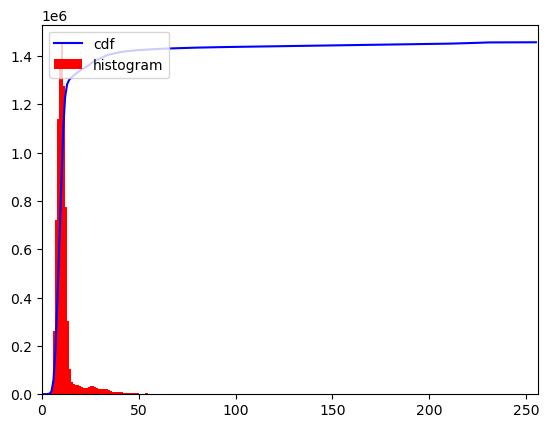

In [3]:
#
# histogram method in numpy, we convert the 2d image into 1d array and the range of values
# set between 0 and 255, number of bins is 256
#
hist,bins = np.histogram(gle.flatten(),256,[0,256])

# cummolative distribution function will be computed, using cumsum function
# then we normalize the results. 
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

# then the histogram and cdf will be plotted
#
plt.plot(cdf_normalized, color = 'b')
plt.hist(gle.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


In [4]:
print('dynamic range is between ', np.min(image), ' and ', np.max(image))

dynamic range is between  0  and  255


In [5]:
# we divide the pixels' value by 2 to make it even lower contrast
gle = gle / 2 

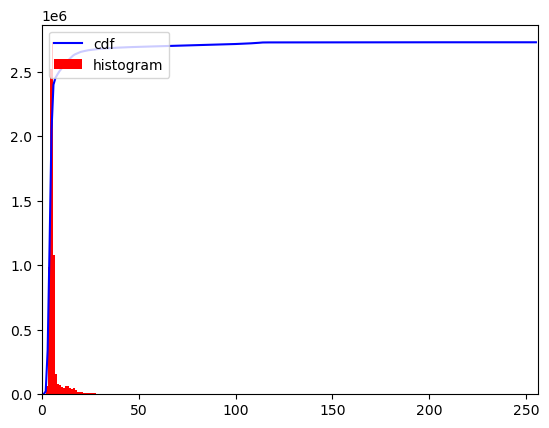

In [6]:
# again, historam nad cdf would be computed and shown
# hist is the histogram, bins is the bins range
#
hist,bins = np.histogram(gle.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(gle.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


In [7]:
bins

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [8]:
hist

array([   1205,    4708,   64269,  984317, 2521514, 2730354, 1076790,
        158729,   80719,   74147,   58972,   52045,   66295,   64670,
         45234,   42473,   45367,   31331,   20288,   20766,   18766,
         12090,    9603,   10511,    8471,    6090,    6523,    6572,
          4819,    4269,    5138,    4241,    3217,    3544,    3563,
          2811,    2543,    2957,    2577,    2123,    2258,    2349,
          1814,    1772,    2039,    1787,    1514,    1654,    1694,
          1368,    1409,    1505,    1437,    1356,    1310,    1363,
          1311,    1320,    1295,    1315,    1302,    1288,    1393,
          1314,    1339,    1357,    1390,    1327,    1286,    1289,
          1299,    1309,    1275,    1309,    1287,    1269,    1327,
          1249,    1272,    1328,    1300,    1221,    1323,    1213,
          1280,    1240,    1281,    1294,    1288,    1370,    1430,
          1329,    1435,    1466,    1451,    1455,    1489,    1512,
          1573,    1

In [9]:
#cv2.namedWindow("div by 2", cv2.WINDOW_NORMAL)
cv2.imshow('div by 2', np.uint8(gle))

In [10]:
# again ....
gle = gle / 2 

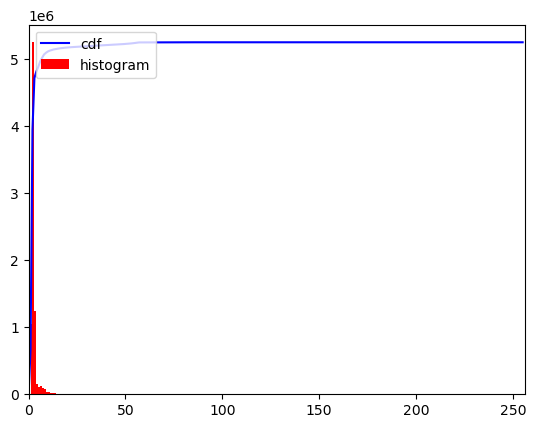

In [11]:
hist,bins = np.histogram(gle.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(gle.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


In [12]:
#cv2.namedWindow("div by 4", cv2.WINDOW_NORMAL)
cv2.imshow('div by 5', np.uint8(gle))

### histogram equalization

In [13]:
# results of division will be converted to uint8
# opencv equalizeHist function to equalize the hist
equ = cv2.equalizeHist(np.uint8(gle))
#cv2.namedWindow("Equalized", cv2.WINDOW_NORMAL)
cv2.imshow('Equalized', np.uint8(equ)) 


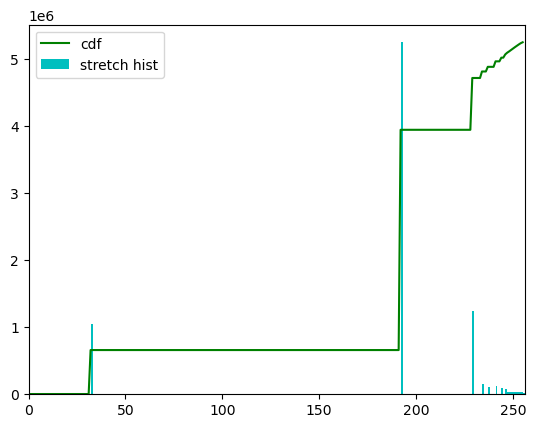

In [14]:
# equalized image histogram and its cdf
#
hist,bins = np.histogram(equ.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'g')
plt.hist(equ.flatten(),256,[0,256], color = 'c')
plt.xlim([0,256])
plt.legend(('cdf','stretch hist'), loc = 'upper left')
plt.show()

In [15]:
cv2.waitKey()
cv2.destroyAllWindows()